In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
class PolynomialBasis1D:
    def __init__(self, h):
        self.h = h
        self.exponents = np.arange(0,self.h)
    
    def forward(self, x):
        basis_values = x[:,None]**self.exponents[None,:]
        return basis_values
    
    def grad(self, x):
        basis_gradients = self.exponents[None,:]*x[:,None]**(self.exponents-1)
        basis_gradients[:,0] = 0
        return basis_gradients

    def plot_1d_basis(self):
        resolution = 1000
        x_values = np.linspace(0, 1, resolution)  # Adjusted range for x_values
        basis_matrix = self.forward(x_values)
        plt.figure(figsize=(8, 6))
        for i in range(self.h):
            plt.plot(x_values, basis_matrix[:,i], label=f'Basis {i}')
        plt.title(f'1D Basis Functions')
        plt.xlabel('x')
        plt.ylabel('Basis Values')
        plt.legend()
        plt.grid(True)
        # plt.savefig("BSpline1D.svg", bbox_inches='tight', transparent=True)
        plt.show()
        
    def plot_1d_basis_gradients(self):
        """
        Plot the gradients of the 1D B-spline basis functions for a specified dimension.

        Args:
        dim_idx (int): Index of the dimension for which to plot the basis function gradients.
        """
        resolution = 1000
        x_values = np.linspace(0, 1, resolution)  # Use full knot span for x_values
        basis_gradients_matrix = self.grad(x_values)
        plt.figure(figsize=(8, 6))
        for i in range(self.h):
            plt.plot(x_values, basis_gradients_matrix[:, i], label=f'Gradient {i}')
        plt.title(f'Gradients of 1D Basis Functions')
        plt.xlabel('x')
        plt.ylabel('Gradient Values')
        plt.legend()
        plt.grid(True)
        # plt.savefig("BSplinegrad1D.svg", bbox_inches='tight', transparent=True)
        plt.show()

In [154]:
basis = PolynomialBasis1D(h=10)

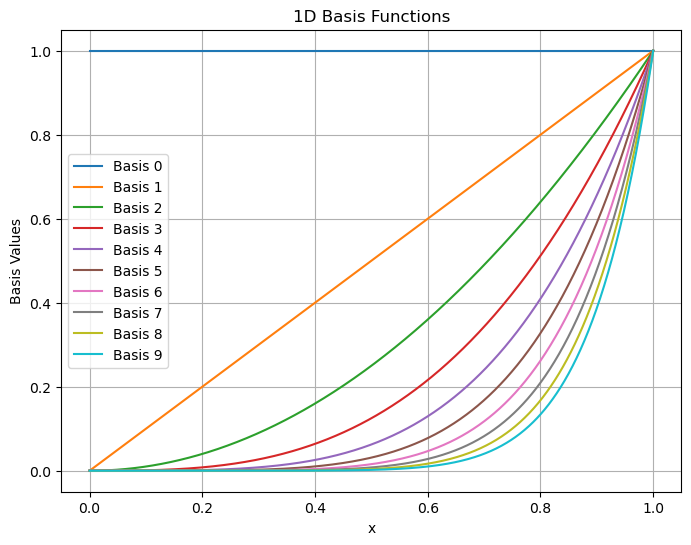

In [155]:
basis.plot_1d_basis()

/tmp/ipykernel_3315149/3369641921.py:11: RuntimeWarning: divide by zero encountered in power
  basis_gradients = self.exponents[None,:]*x[:,None]**(self.exponents-1)
/tmp/ipykernel_3315149/3369641921.py:11: RuntimeWarning: invalid value encountered in multiply
  basis_gradients = self.exponents[None,:]*x[:,None]**(self.exponents-1)


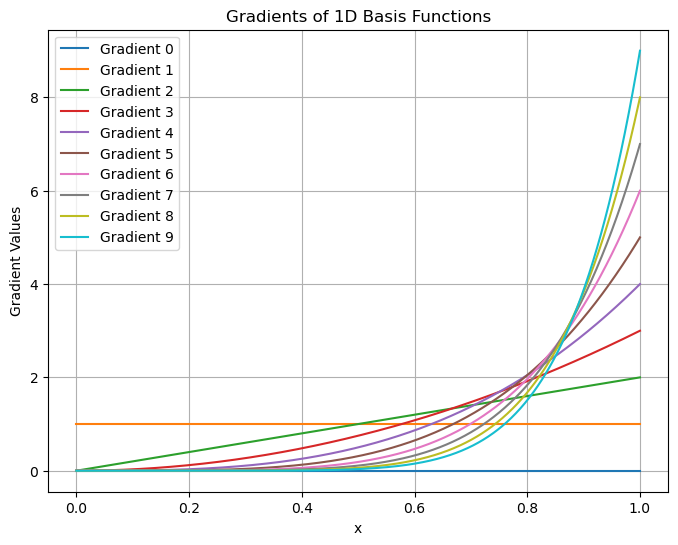

In [156]:
basis.plot_1d_basis_gradients()